# Practico 3

## 🎬 Parte 1: Setup y Carga de Datos

In [1]:
# Importar librerías que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de visualizaciones
plt.style.use('default')  # establecer estilo visual (ej: 'default', 'seaborn', 'classic')
sns.set_palette("viridis")  # definir paleta de colores (ej: 'husl', 'Set1', 'viridis')
plt.rcParams['figure.figsize'] = (10, 6)  # tamaño por defecto

print("✅ Setup completo!")

✅ Setup completo!


## 🎬 Paso 2: Cargar y Explorar Dataset Netflix

In [2]:
# === CARGAR DATOS DE NETFLIX ===

# 1. Cargar el dataset desde una URL
url = "https://raw.githubusercontent.com/swapnilg4u/Netflix-Data-Analysis/refs/heads/master/netflix_titles.csv"
df = pd.read_csv(url)  # función para leer archivos CSV desde URL o archivo local

print("🎬 DATASET: Netflix Titles")
print(f"   📊 Forma: {df.shape}")
print(f"   📋 Columnas: {list(df.columns)}")

# 2. Explorar los datos básicamente
print("\n🔍 Primeras 5 filas:")
print(df.head())  # método para mostrar las primeras filas del DataFrame

# 3. Información sobre tipos de datos y memoria
print("\n📋 INFORMACIÓN GENERAL:")
print(df.info())  # método que muestra tipos de datos, memoria y valores no nulos

# 4. Estadísticas básicas para columnas numéricas
print("\n📊 ESTADÍSTICAS BÁSICAS:")
print(df.describe())  # método que calcula estadísticas descriptivas (mean, std, min, max, etc.)

🎬 DATASET: Netflix Titles
   📊 Forma: (6234, 12)
   📋 Columnas: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

🔍 Primeras 5 filas:
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Mont

❌ DATOS FALTANTES:
director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64

📊 PORCENTAJES:
director      31.584857
cast           9.143407
country        7.635547
date_added     0.176452
rating         0.160411
dtype: float64


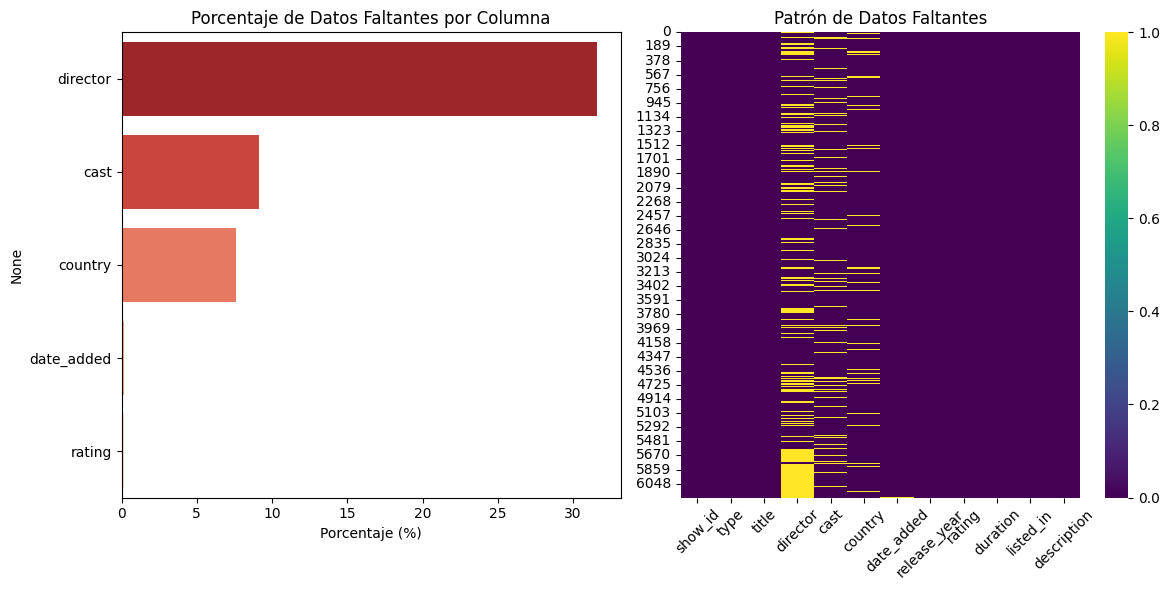

In [3]:
# === DETECTAR Y VISUALIZAR DATOS FALTANTES ===

# 1. Calcular datos faltantes por columna
missing_data = df.isnull().sum().sort_values(ascending=False)  # detectar valores nulos y contar por columna
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)  # calcular porcentaje de nulos

print("❌ DATOS FALTANTES:")
print(missing_data[missing_data > 0])
print("\n📊 PORCENTAJES:")
print(missing_percent[missing_percent > 0])

# 2. Crear visualización de datos faltantes
plt.figure(figsize=(12, 6))

# Subplot 1: Gráfico de barras de datos faltantes
plt.subplot(1, 2, 1)
sns.barplot(x=missing_percent[missing_percent > 0].values,  # función para crear barras horizontales
            y=missing_percent[missing_percent > 0].index,
            hue=missing_percent[missing_percent > 0].index,
            palette='Reds_r')
plt.title('Porcentaje de Datos Faltantes por Columna')
plt.xlabel('Porcentaje (%)')

# Subplot 2: Heatmap de datos faltantes
plt.subplot(1, 2, 2)
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')  # función para crear mapa de calor de valores booleanos
plt.title('Patrón de Datos Faltantes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()  # función para mostrar/renderizar los gráficos en pantalla

🔍 ANÁLISIS DE OUTLIERS EN AÑOS:
count    6234.00000
mean     2013.35932
std         8.81162
min      1925.00000
25%      2013.00000
50%      2016.00000
75%      2018.00000
max      2020.00000
Name: release_year_clean, dtype: float64

⚠️ Contenido muy antiguo (< 1950): 16 títulos
Ejemplos:
                         title  release_year   type
2005   Know Your Enemy - Japan          1945  Movie
2006        Let There Be Light          1946  Movie
2009  Nazi Concentration Camps          1945  Movie
2011            Prelude to War          1942  Movie
2012                San Pietro          1945  Movie

⚠️ Lanzamientos futuros (> 2025): 0 títulos

🔄 TÍTULOS DUPLICADOS: 57 títulos aparecen múltiples veces

📏 TÍTULOS EXTREMOS:
   Muy largos (> percentil 99): 62 títulos
   Ejemplo más largo: 'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'
   Muy cortos (< 5 caracteres): 173 títulos
   Ejemplos:
    title  title_length   type
19   Love    

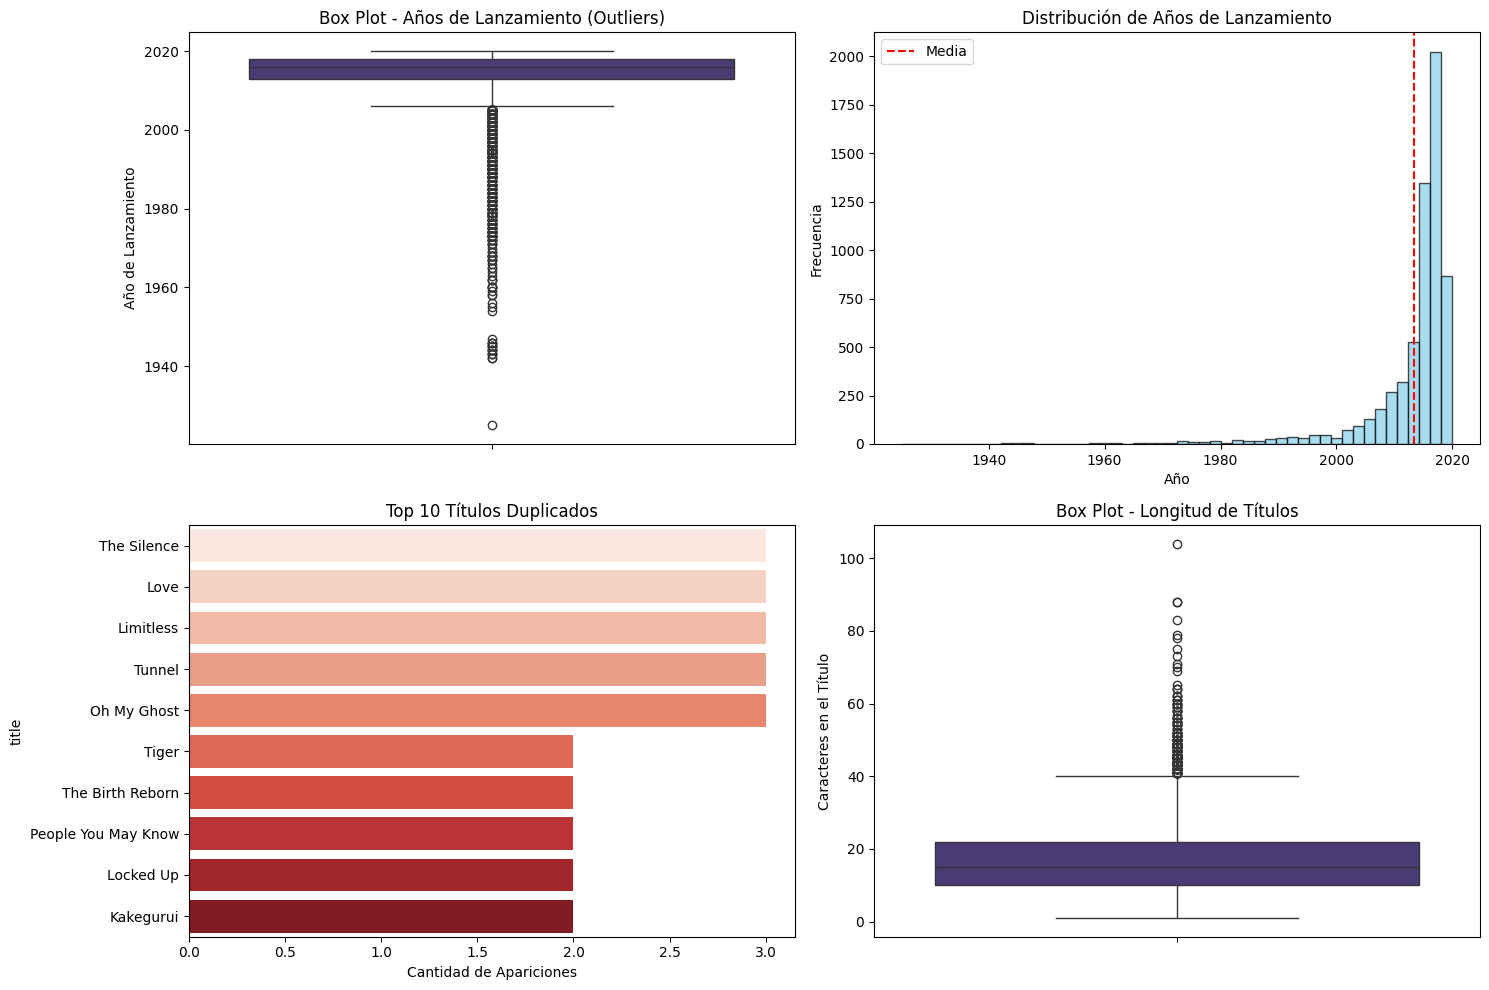

✅ Análisis de outliers completado!


In [4]:
# === DETECCIÓN DE OUTLIERS Y ANOMALÍAS ===

# 1. Analizar años de lanzamiento atípicos
print("🔍 ANÁLISIS DE OUTLIERS EN AÑOS:")
df['release_year_clean'] = pd.to_numeric(df['release_year'], errors='coerce')
year_stats = df['release_year_clean'].describe()
print(year_stats)

# Identificar años sospechosos
very_old = df[df['release_year_clean'] < 1950]
future_releases = df[df['release_year_clean'] > 2025]

print(f"\n⚠️ Contenido muy antiguo (< 1950): {len(very_old)} títulos")
if len(very_old) > 0:
    print("Ejemplos:")
    print(very_old[['title', 'release_year', 'type']].head())

print(f"\n⚠️ Lanzamientos futuros (> 2025): {len(future_releases)} títulos")
if len(future_releases) > 0:
    print("Ejemplos:")
    print(future_releases[['title', 'release_year', 'type']].head())

# 2. Crear visualizaciones para detectar outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Box plot para detectar outliers en años
sns.boxplot(data=df, y='release_year_clean', ax=axes[0, 0])  # función para mostrar outliers con cajas
axes[0, 0].set_title('Box Plot - Años de Lanzamiento (Outliers)')
axes[0, 0].set_ylabel('Año de Lanzamiento')

# Gráfico 2: Histograma de años para ver distribución
axes[0, 1].hist(df['release_year_clean'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')  # histograma con muchos bins
axes[0, 1].set_title('Distribución de Años de Lanzamiento')
axes[0, 1].set_xlabel('Año')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(df['release_year_clean'].mean(), color='red', linestyle='--', label='Media')
axes[0, 1].legend()

# Gráfico 3: Análisis de títulos duplicados
title_counts = df['title'].value_counts()  # contar frecuencias de títulos
duplicated_titles = title_counts[title_counts > 1]

print(f"\n🔄 TÍTULOS DUPLICADOS: {len(duplicated_titles)} títulos aparecen múltiples veces")
if len(duplicated_titles) > 0:
    top_duplicates = duplicated_titles.head(10)
    sns.barplot(y=top_duplicates.index, x=top_duplicates.values, ax=axes[1, 0], hue=top_duplicates.index, palette='Reds')  # barras horizontales
    axes[1, 0].set_title('Top 10 Títulos Duplicados')
    axes[1, 0].set_xlabel('Cantidad de Apariciones')
else:
    axes[1, 0].text(0.5, 0.5, 'No se encontraron\ntítulos duplicados',
                    ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Títulos Duplicados - Sin Datos')

# Gráfico 4: Longitud de títulos (outliers en texto)
df['title_length'] = df['title'].str.len()
title_length_stats = df['title_length'].describe()

sns.boxplot(data=df, y='title_length', ax=axes[1, 1])  # box plot para longitud de títulos
axes[1, 1].set_title('Box Plot - Longitud de Títulos')
axes[1, 1].set_ylabel('Caracteres en el Título')

# Identificar títulos extremadamente largos o cortos
very_long_titles = df[df['title_length'] > df['title_length'].quantile(0.99)]
very_short_titles = df[df['title_length'] < 5]

print(f"\n📏 TÍTULOS EXTREMOS:")
print(f"   Muy largos (> percentil 99): {len(very_long_titles)} títulos")
if len(very_long_titles) > 0:
    print(f"   Ejemplo más largo: '{very_long_titles.loc[very_long_titles['title_length'].idxmax(), 'title']}'")

print(f"   Muy cortos (< 5 caracteres): {len(very_short_titles)} títulos")
if len(very_short_titles) > 0:
    print("   Ejemplos:")
    print(very_short_titles[['title', 'title_length', 'type']].head())

plt.tight_layout()
plt.show()

print("✅ Análisis de outliers completado!")

🎭 TIPOS DE CONTENIDO:
type
Movie      4265
TV Show    1969
Name: count, dtype: int64

Porcentajes:
type
Movie      68.415143
TV Show    31.584857
Name: proportion, dtype: float64


/tmp/ipython-input-2552210387.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', ax=axes[0, 0], palette='Set2')  # función para contar y graficar categorías
/tmp/ipython-input-2552210387.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=type_counts.index, x=type_counts.values, ax=axes[1, 0], palette='viridis')  # función para barras horizontales


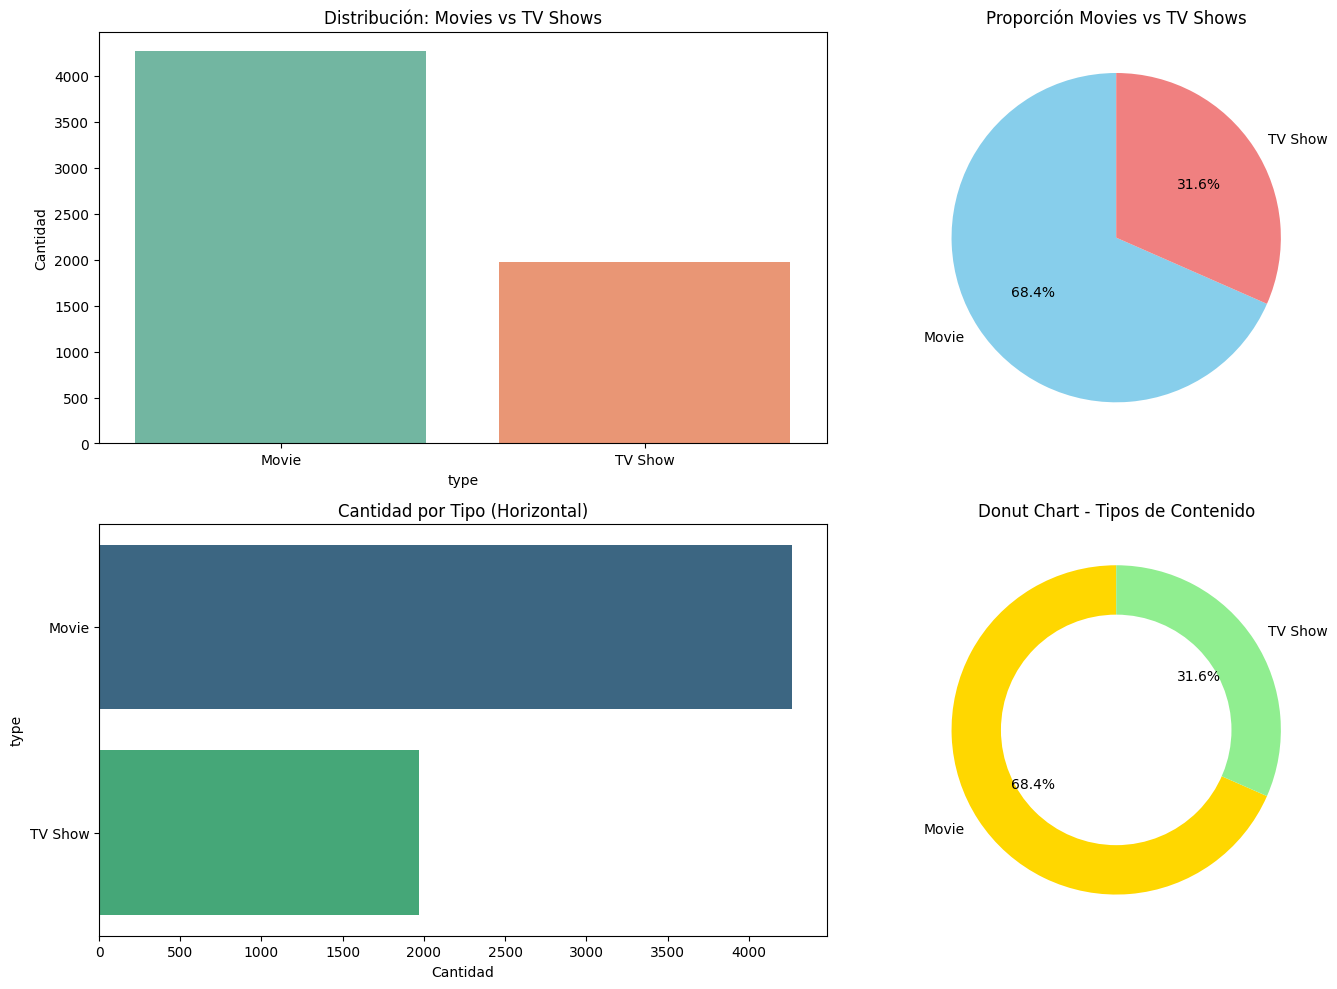

In [5]:
# === ANÁLISIS DE TIPOS DE CONTENIDO ===

# 1. Calcular frecuencias
type_counts = df['type'].value_counts()  # método para contar frecuencias de cada categoría única
type_percent = df['type'].value_counts(normalize=True) * 100  # mismo método pero calculando porcentajes

print("🎭 TIPOS DE CONTENIDO:")
print(type_counts)
print(f"\nPorcentajes:")
print(type_percent)

# 2. Crear visualizaciones múltiples
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Countplot básico
sns.countplot(data=df, x='type', ax=axes[0, 0], palette='Set2')  # función para contar y graficar categorías
axes[0, 0].set_title('Distribución: Movies vs TV Shows')
axes[0, 0].set_ylabel('Cantidad')

# Gráfico 2: Pie chart
axes[0, 1].pie(type_counts.values, labels=type_counts.index,  # función para crear gráfico circular/torta
                  autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[0, 1].set_title('Proporción Movies vs TV Shows')

# Gráfico 3: Barplot horizontal
sns.barplot(y=type_counts.index, x=type_counts.values, ax=axes[1, 0], palette='viridis')  # función para barras horizontales
axes[1, 0].set_title('Cantidad por Tipo (Horizontal)')
axes[1, 0].set_xlabel('Cantidad')

# Gráfico 4: Donut chart (más avanzado)
wedges, texts, autotexts = axes[1, 1].pie(type_counts.values, labels=type_counts.index,  # misma función de torta para donut
                                             autopct='%1.1f%%', startangle=90,
                                             colors=['gold', 'lightgreen'])
# Crear el hueco del donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
axes[1, 1].add_artist(centre_circle)
axes[1, 1].set_title('Donut Chart - Tipos de Contenido')

plt.tight_layout()
plt.show()

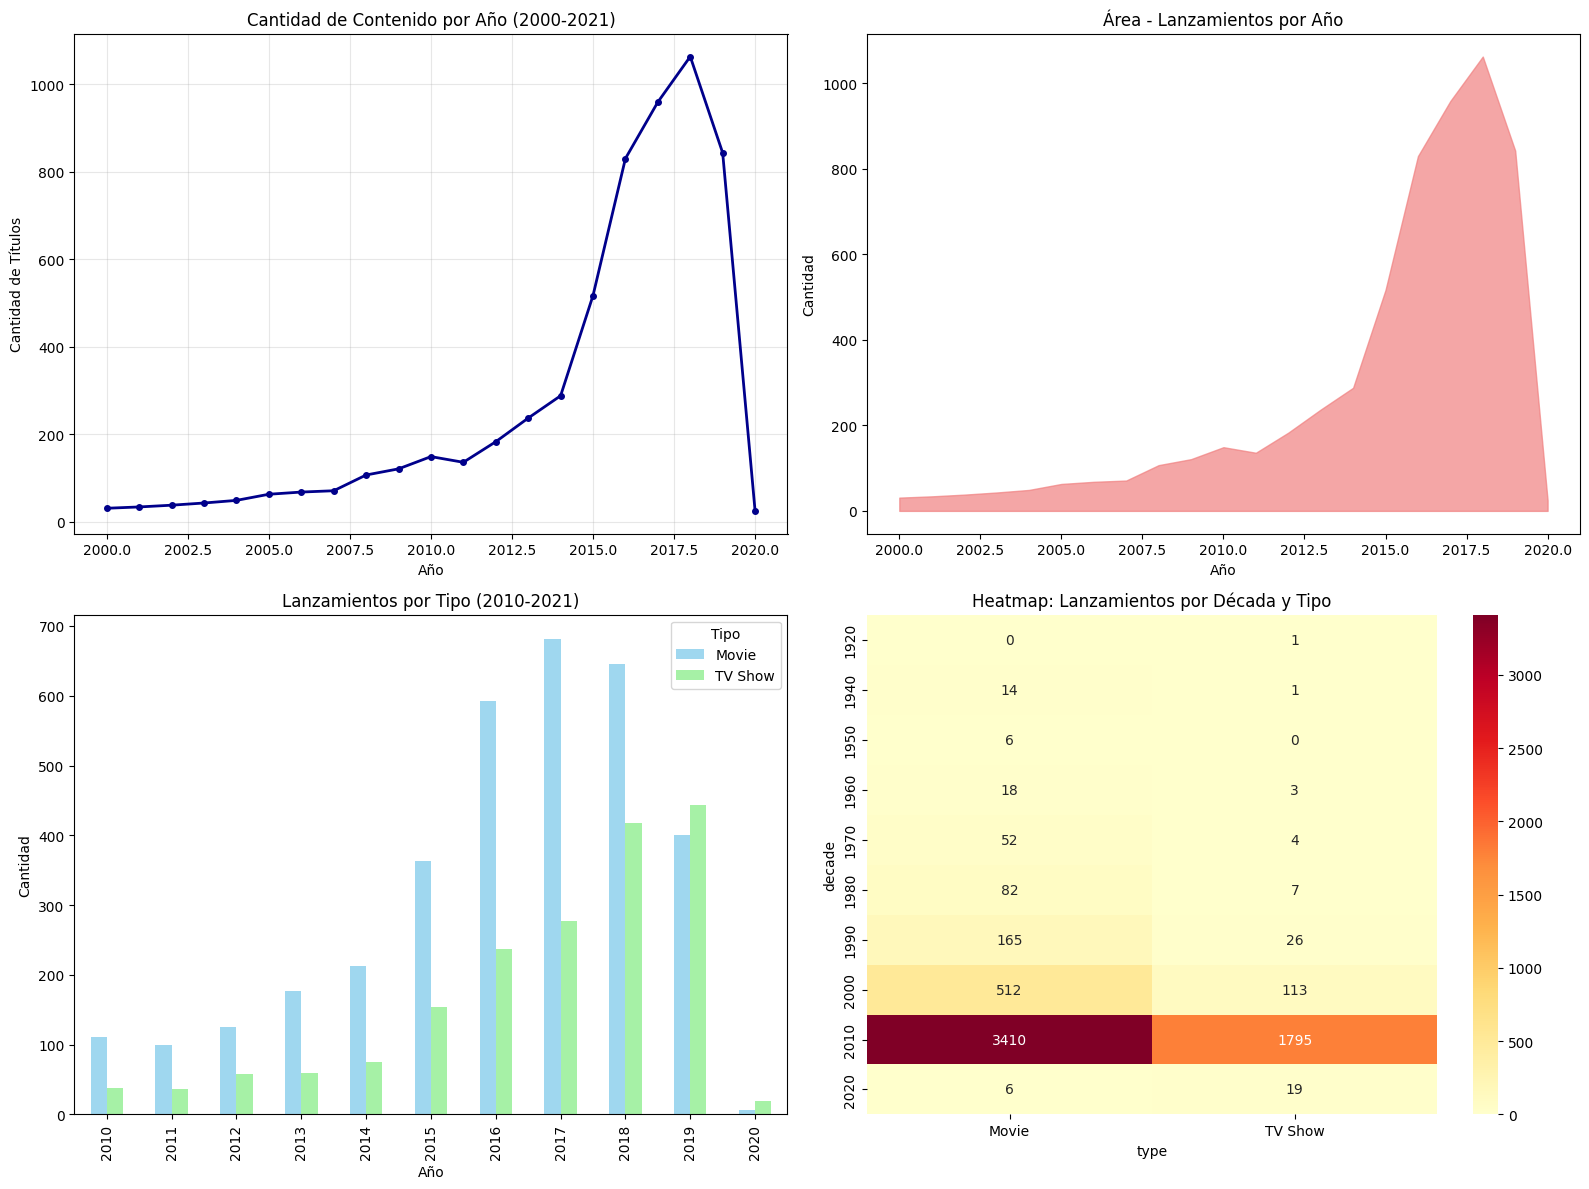

📅 AÑOS CON MÁS LANZAMIENTOS:
release_year
2011     136
2012     183
2013     237
2014     288
2015     517
2016     830
2017     959
2018    1063
2019     843
2020      25
Name: count, dtype: int64


In [6]:
# === ANÁLISIS DE TENDENCIAS TEMPORALES ===

# 1. Preparar datos temporales
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')  # convertir a numérico, NaN si no es posible
yearly_releases = df['release_year'].value_counts().sort_index()  # contar frecuencias por año y ordenar

# Filtrar años recientes para mejor visualización
recent_years = yearly_releases[yearly_releases.index >= 2000]

# 2. Crear visualizaciones temporales múltiples
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Línea temporal
axes[0, 0].plot(recent_years.index, recent_years.values,  # función para crear líneas conectando puntos
                  marker='o', linewidth=2, markersize=4, color='darkblue')
axes[0, 0].set_title('Cantidad de Contenido por Año (2000-2021)')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Cantidad de Títulos')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Área bajo la curva
axes[0, 1].fill_between(recent_years.index, recent_years.values,  # función para rellenar área bajo la línea
                  alpha=0.7, color='lightcoral')
axes[0, 1].set_title('Área - Lanzamientos por Año')
axes[0, 1].set_xlabel('Año')
axes[0, 1].set_ylabel('Cantidad')

# Gráfico 3: Análisis por tipo de contenido
df_recent = df[df['release_year'] >= 2010]
yearly_by_type = df_recent.groupby(['release_year', 'type']).size().unstack(fill_value=0)

yearly_by_type.plot(kind='bar', ax=axes[1, 0],  # tipo de gráfico con barras lado a lado (no apiladas)
                    color=['skyblue', 'lightgreen'], alpha=0.8)
axes[1, 0].set_title('Lanzamientos por Tipo (2010-2021)')
axes[1, 0].set_xlabel('Año')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].legend(title='Tipo')

# Gráfico 4: Heatmap de lanzamientos por década y tipo
df['decade'] = (df['release_year'] // 10) * 10
decade_type = df.groupby(['decade', 'type']).size().unstack(fill_value=0)
sns.heatmap(decade_type, annot=True, fmt='d', ax=axes[1, 1], cmap='YlOrRd')  # función para mapa de calor con anotaciones
axes[1, 1].set_title('Heatmap: Lanzamientos por Década y Tipo')

plt.tight_layout()
plt.show()

print("📅 AÑOS CON MÁS LANZAMIENTOS:")
print(yearly_releases.tail(10))

🌍 TOP 20 PAÍSES CON MÁS CONTENIDO:
country
United States     2609
India              838
United Kingdom     601
Canada             318
France             271
Japan              231
Spain              178
South Korea        162
Germany            151
Mexico             129
Australia          126
China              120
Hong Kong           97
Turkey              87
Taiwan              75
Argentina           68
Italy               67
Belgium             66
Brazil              66
Thailand            56
Name: count, dtype: int64


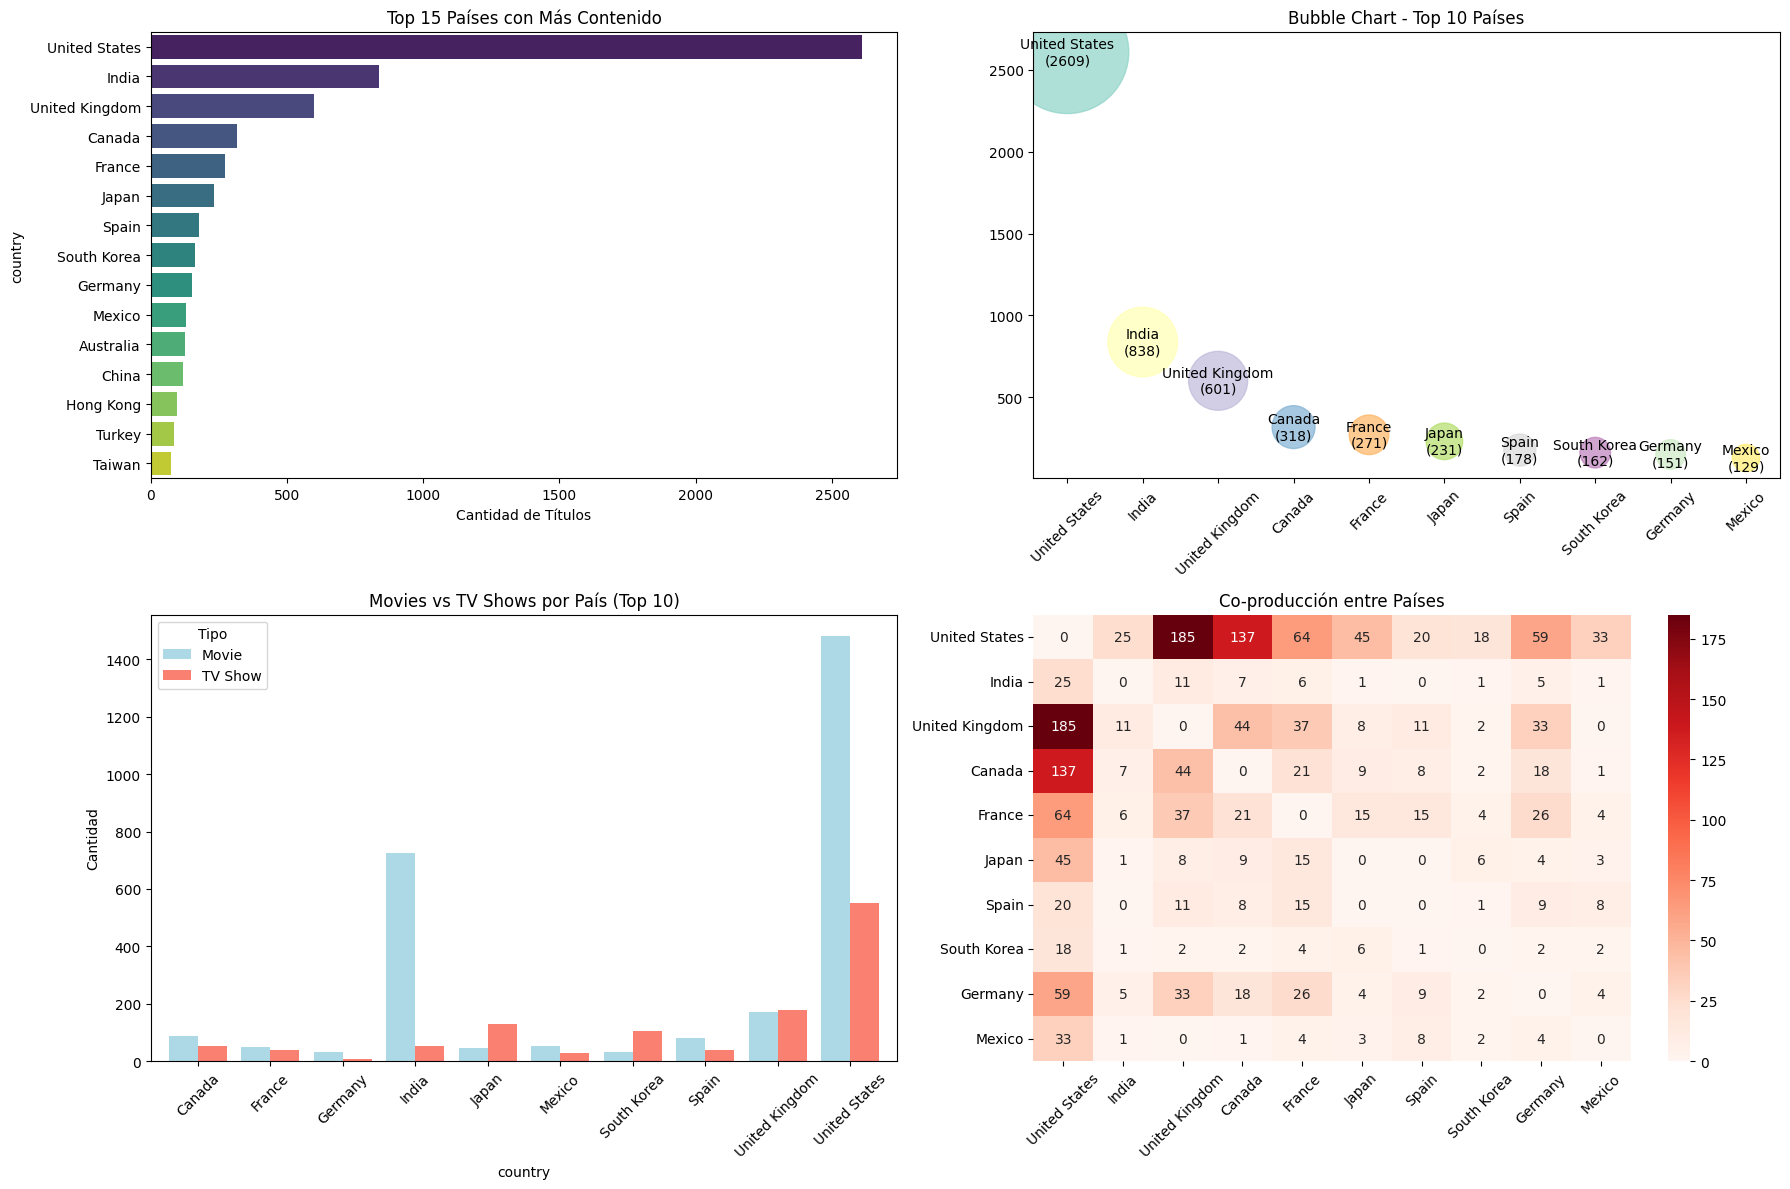

In [7]:
# === ANÁLISIS DE PAÍSES CON VISUALIZACIONES ===

# 1. Preparar datos de países (limpiar y separar países múltiples)
df_countries = df.dropna(subset=['country']).copy()

# Separar países que están separados por comas
countries_expanded = df_countries['country'].str.split(', ').explode()
country_counts = countries_expanded.value_counts().head(20)  # contar frecuencias de países y tomar top 20

print("🌍 TOP 20 PAÍSES CON MÁS CONTENIDO:")
print(country_counts)

# 2. Crear visualizaciones geográficas
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico 1: Top 15 países - barras horizontales
top_15_countries = country_counts.head(15)
sns.barplot(y=top_15_countries.index, x=top_15_countries.values,  # función para barras horizontales
           ax=axes[0, 0], hue=top_15_countries.index, palette='viridis')
axes[0, 0].set_title('Top 15 Países con Más Contenido')
axes[0, 0].set_xlabel('Cantidad de Títulos')

# Gráfico 2: Treemap simulado con scatter
top_10 = country_counts.head(10)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_10)))
axes[0, 1].scatter(range(len(top_10)), top_10.values,  # función para gráfico de burbujas/puntos
                  s=top_10.values*3, c=colors, alpha=0.7)
for i, (country, count) in enumerate(top_10.items()):
    axes[0, 1].annotate(f'{country}\n({count})',
                       (i, count), ha='center', va='center')
axes[0, 1].set_title('Bubble Chart - Top 10 Países')
axes[0, 1].set_xticks(range(len(top_10)))
axes[0, 1].set_xticklabels(top_10.index, rotation=45)

# Gráfico 3: Análisis de contenido por país y tipo
top_countries = country_counts.head(10).index
df_top_countries = df_countries[df_countries['country'].isin(top_countries)]
country_type = df_top_countries.groupby(['country', 'type']).size().unstack(fill_value=0)

country_type.plot(kind='bar', ax=axes[1, 0],  # tipo de gráfico con barras agrupadas lado a lado
                  color=['lightblue', 'salmon'], width=0.8)
axes[1, 0].set_title('Movies vs TV Shows por País (Top 10)')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].legend(title='Tipo')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Heatmap de correlación entre países principales
# Crear matriz de co-ocurrencia de países
from itertools import combinations
co_occurrence = {}
for countries_str in df_countries['country']:
    if pd.notna(countries_str) and ',' in countries_str:
        countries_list = [c.strip() for c in countries_str.split(',')]
        for c1, c2 in combinations(countries_list, 2):
            if c1 in top_10.index and c2 in top_10.index:
                key = tuple(sorted([c1, c2]))
                co_occurrence[key] = co_occurrence.get(key, 0) + 1

# Crear matriz para heatmap
co_matrix = np.zeros((len(top_10), len(top_10)))
for i, c1 in enumerate(top_10.index):
    for j, c2 in enumerate(top_10.index):
        if i != j:
            key = tuple(sorted([c1, c2]))
            co_matrix[i, j] = co_occurrence.get(key, 0)

sns.heatmap(co_matrix, annot=True, fmt='.0f',  # función para mapa de calor (formato .0f para números flotantes)
           xticklabels=top_10.index, yticklabels=top_10.index,
           ax=axes[1, 1], cmap='Reds')
axes[1, 1].set_title('Co-producción entre Países')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

🔞 TOP 10 RATINGS MÁS COMUNES:
rating
TV-MA    2027
TV-14    1698
TV-PG     701
R         508
PG-13     286
NR        218
PG        184
TV-Y7     169
TV-G      149
TV-Y      143
Name: count, dtype: int64


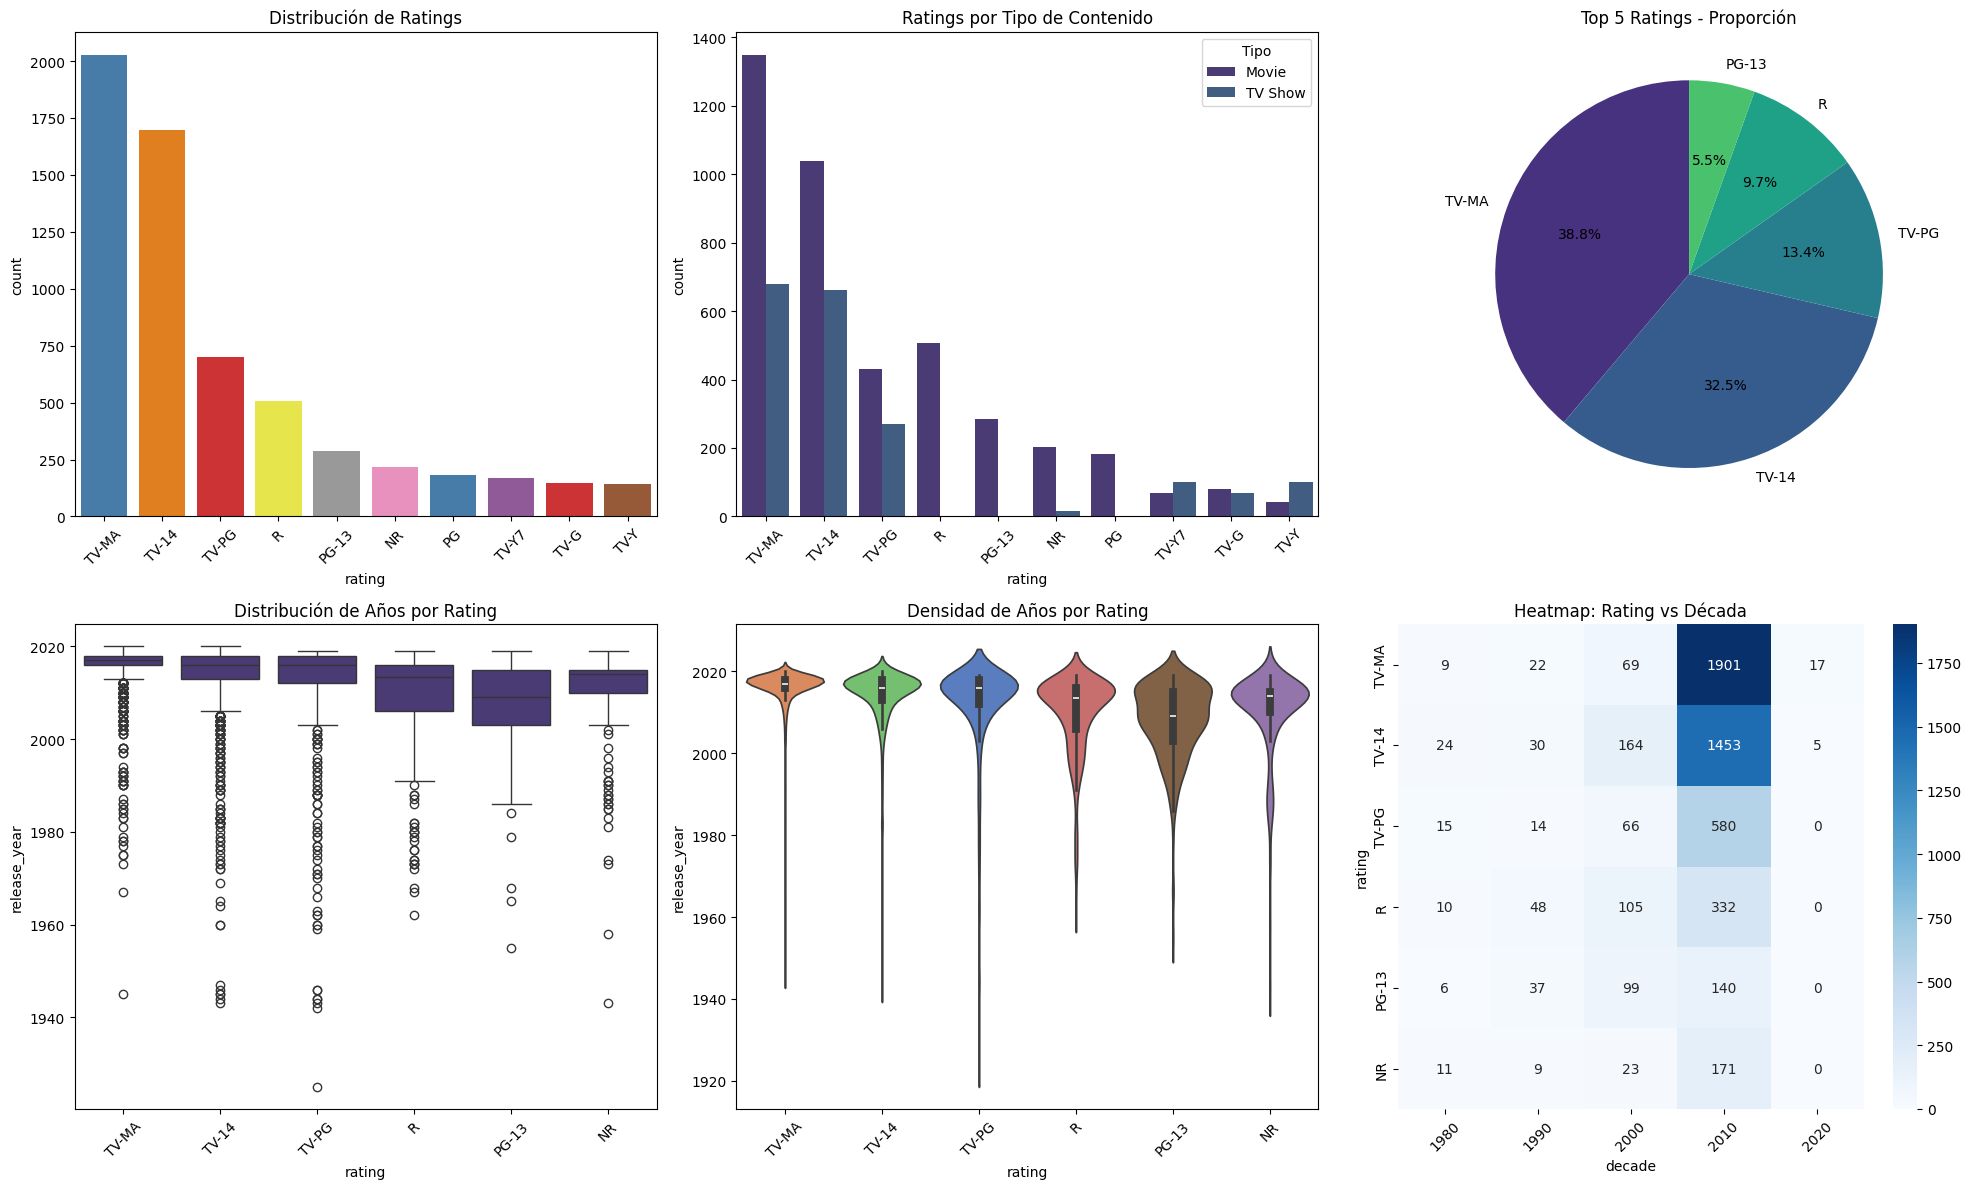

In [8]:
# === ANÁLISIS DE RATINGS Y GÉNEROS ===

# 1. Preparar datos de ratings
rating_counts = df['rating'].value_counts().head(10)  # contar frecuencias de ratings y tomar top 10

print("🔞 TOP 10 RATINGS MÁS COMUNES:")
print(rating_counts)

# 2. Crear dashboard de ratings
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Gráfico 1: Countplot de ratings
sns.countplot(data=df, x='rating', order=rating_counts.index,  # función para contar y graficar categorías ordenadas
           ax=axes[0, 0], palette='Set1', hue='rating', legend=False) # Corregido: Añadir hue y legend=False
axes[0, 0].set_title('Distribución de Ratings')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Ratings por tipo de contenido
sns.countplot(data=df, x='rating', hue='type',  # misma función pero separando por otra variable (hue)
           order=rating_counts.index, ax=axes[0, 1])
axes[0, 1].set_title('Ratings por Tipo de Contenido')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Tipo')

# Gráfico 3: Pie chart de ratings principales
top_5_ratings = rating_counts.head(5)
axes[0, 2].pie(top_5_ratings.values, labels=top_5_ratings.index,  # función para gráfico circular/torta
                  autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Top 5 Ratings - Proporción')

# Gráfico 4: Box plot de años de lanzamiento por rating
df_clean = df.dropna(subset=['rating', 'release_year']).copy() # Añadir .copy() para evitar SettingWithCopyWarning
top_ratings = rating_counts.head(6).index
df_top_ratings = df_clean[df_clean['rating'].isin(top_ratings)]

sns.boxplot(data=df_top_ratings, x='rating', y='release_year',  # función para mostrar distribución con cajas y bigotes
           order=top_ratings, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Años por Rating')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 5: Violin plot alternativo
sns.violinplot(data=df_top_ratings, x='rating', y='release_year',  # función para mostrar densidad como "violines"
           order=top_ratings, ax=axes[1, 1], palette='muted', hue='rating', legend=False) # Corregido: Añadir hue y legend=False
axes[1, 1].set_title('Densidad de Años por Rating')
axes[1, 1].tick_params(axis='x', rotation=45)

# Gráfico 6: Heatmap de rating vs década
df_clean.loc[:, 'decade'] = (df_clean['release_year'] // 10) * 10 # Corregido: Usar .loc para evitar SettingWithCopyWarning
rating_decade = df_clean.groupby(['rating', 'decade']).size().unstack(fill_value=0)
# Filtrar solo ratings principales y décadas recientes
rating_decade_filtered = rating_decade.loc[top_ratings, rating_decade.columns >= 1980]

sns.heatmap(rating_decade_filtered, annot=True, fmt='d',  # función para mapa de calor con valores enteros
           ax=axes[1, 2], cmap='Blues')
axes[1, 2].set_title('Heatmap: Rating vs Década')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

📊 RESUMEN EJECUTIVO NETFLIX:
   Total de títulos: 6,234
   Películas: 4,265 (68.4%)
   Series: 1,969 (31.6%)
   Rango de años: 1925 - 2020


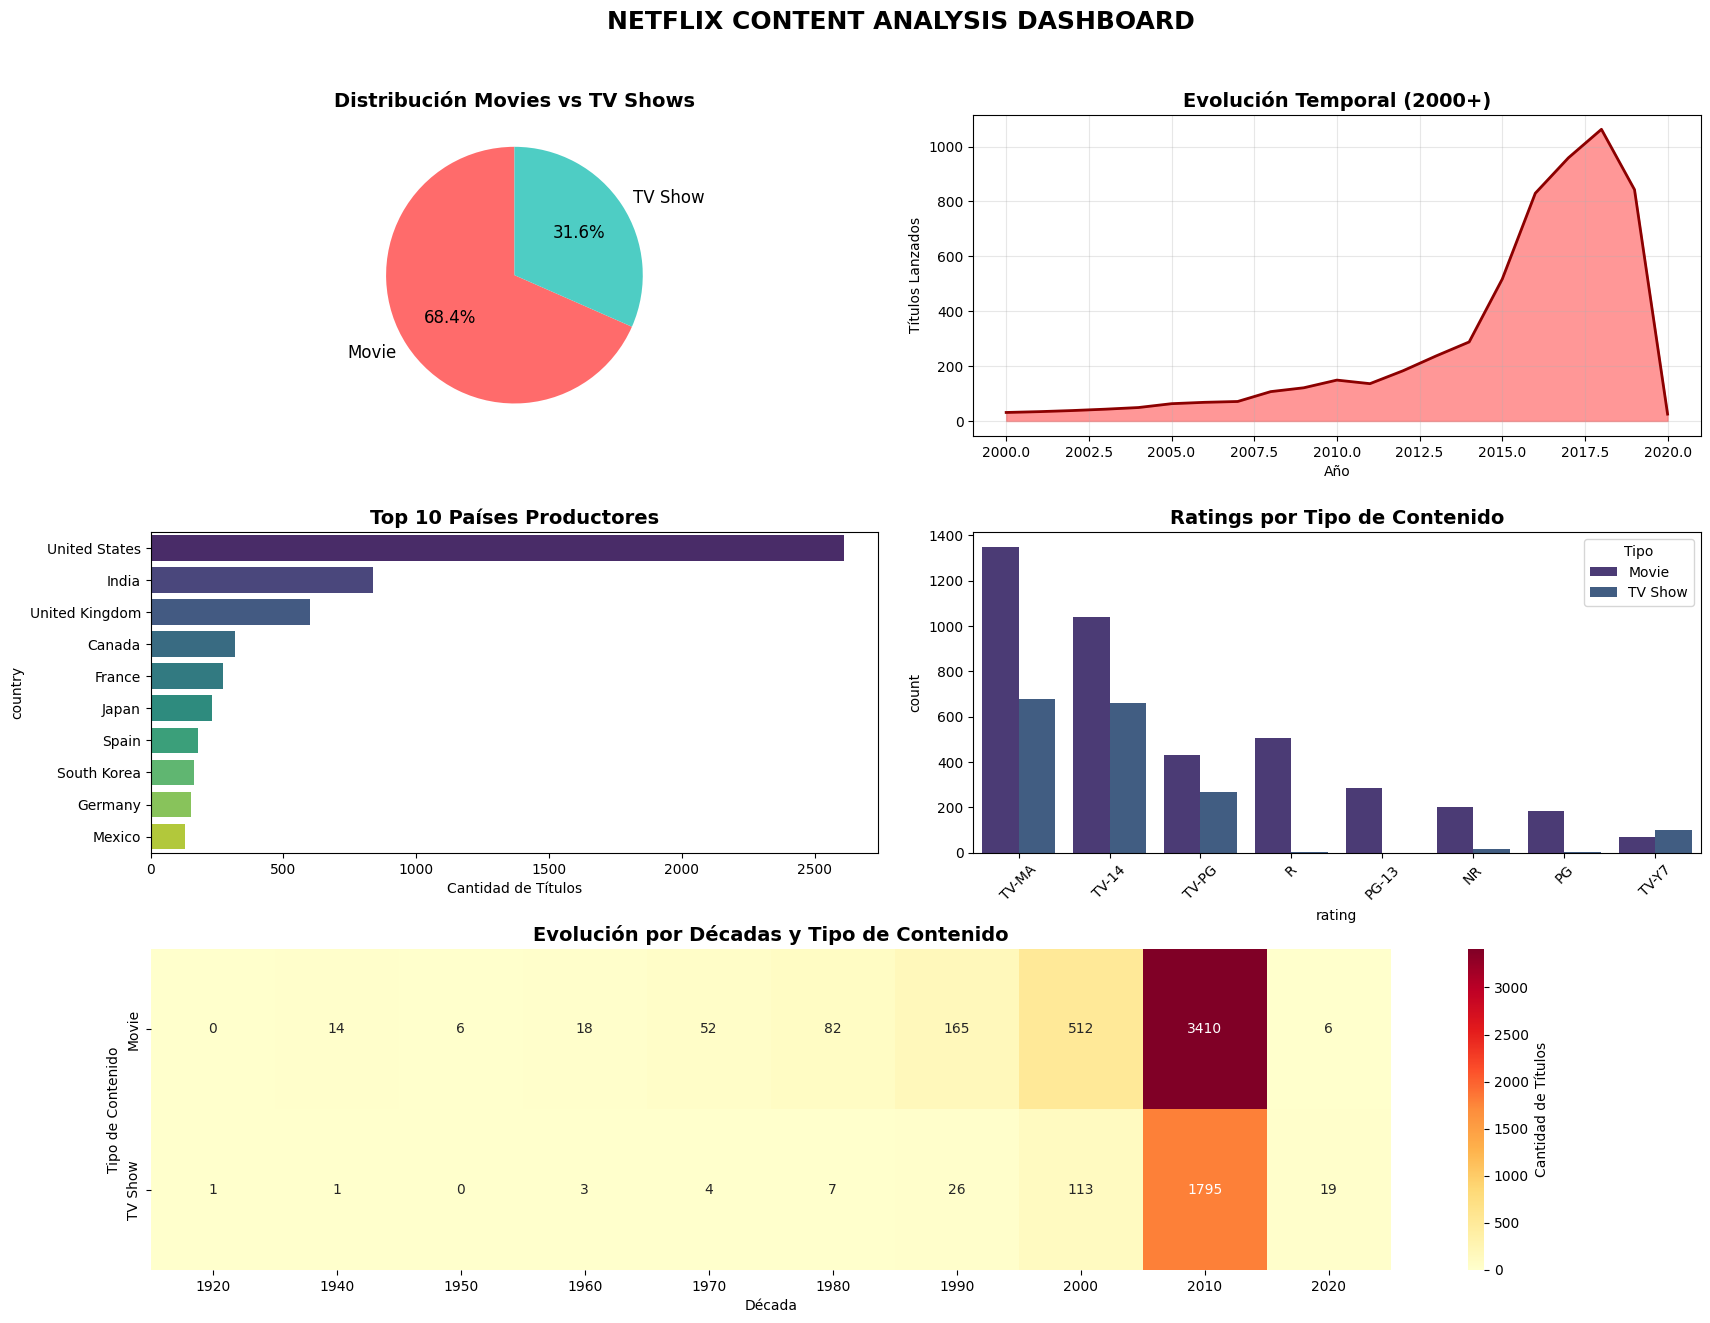


✅ Dashboard guardado como 'netflix_dashboard.png'


In [9]:
# === CREAR DASHBOARD FINAL INTERACTIVO ===

# 1. Calcular estadísticas finales
total_titles = len(df)
total_movies = len(df[df['type'] == 'Movie'])
total_shows = len(df[df['type'] == 'TV Show'])
latest_year = df['release_year'].max()
oldest_year = df['release_year'].min()

print(f"📊 RESUMEN EJECUTIVO NETFLIX:")
print(f"   Total de títulos: {total_titles:,}")
print(f"   Películas: {total_movies:,} ({total_movies/total_titles*100:.1f}%)")
print(f"   Series: {total_shows:,} ({total_shows/total_titles*100:.1f}%)")
print(f"   Rango de años: {oldest_year} - {latest_year}")

# 2. Crear figura principal con subplots
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# Dashboard panel 1: Tipos (grande)
ax1 = fig.add_subplot(gs[0, :2])
type_data = df['type'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
wedges, texts, autotexts = ax1.pie(type_data.values, labels=type_data.index,  # función para gráfico de torta en dashboard
                                       autopct='%1.1f%%', startangle=90,
                                       colors=colors, textprops={'fontsize': 12})
ax1.set_title('Distribución Movies vs TV Shows', fontsize=14, fontweight='bold')

# Dashboard panel 2: Timeline
ax2 = fig.add_subplot(gs[0, 2:])
yearly = df.groupby('release_year').size()
recent_years = yearly[yearly.index >= 2000]
ax2.fill_between(recent_years.index, recent_years.values, color='#FF6B6B', alpha=0.7)  # función para rellenar área bajo curva
ax2.plot(recent_years.index, recent_years.values, color='darkred', linewidth=2)
ax2.set_title('Evolución Temporal (2000+)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Año')
ax2.set_ylabel('Títulos Lanzados')
ax2.grid(True, alpha=0.3)

# Dashboard panel 3: Top países
ax3 = fig.add_subplot(gs[1, :2])
country_clean = df.dropna(subset=['country'])['country'].str.split(', ').explode()
top_countries = country_clean.value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, hue=top_countries.index, ax=ax3, palette='viridis')  # función para barras horizontales
ax3.set_title('Top 10 Países Productores', fontsize=14, fontweight='bold')
ax3.set_xlabel('Cantidad de Títulos')

# Dashboard panel 4: Ratings
ax4 = fig.add_subplot(gs[1, 2:])
top_ratings = df['rating'].value_counts().head(8)
sns.countplot(data=df[df['rating'].isin(top_ratings.index)],  # función para contar categorías separadas por hue
           x='rating', hue='type', order=top_ratings.index, ax=ax4)
ax4.set_title('Ratings por Tipo de Contenido', fontsize=14, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.legend(title='Tipo')

# Dashboard panel 5: Heatmap temporal (full width)
ax5 = fig.add_subplot(gs[2, :])
df['decade'] = (df['release_year'] // 10) * 10
year_type_decade = df.groupby(['decade', 'type']).size().unstack(fill_value=0)
sns.heatmap(year_type_decade.T, annot=True, fmt='d', ax=ax5,  # función para mapa de calor transpuesto (.T)
           cmap='YlOrRd', cbar_kws={'label': 'Cantidad de Títulos'})
ax5.set_title('Evolución por Décadas y Tipo de Contenido', fontsize=14, fontweight='bold')
ax5.set_xlabel('Década')
ax5.set_ylabel('Tipo de Contenido')

# Guardar el dashboard
plt.suptitle('NETFLIX CONTENT ANALYSIS DASHBOARD', fontsize=18, fontweight='bold', y=0.95) # Corregido: Eliminar emoji
plt.savefig(f'netflix_dashboard.png', dpi=300, bbox_inches='tight')  # función para guardar figura como archivo
plt.show()

print("\n✅ Dashboard guardado como 'netflix_dashboard.png'")

🎬 TOP 15 GÉNEROS MÁS POPULARES:
listed_in
International Movies        1927
Dramas                      1623
Comedies                    1113
International TV Shows      1001
Documentaries                668
TV Dramas                    599
Action & Adventure           597
Independent Movies           552
TV Comedies                  436
Thrillers                    392
Children & Family Movies     378
Romantic Movies              376
Crime TV Shows               363
Kids' TV                     328
Stand-Up Comedy              281
Name: count, dtype: int64


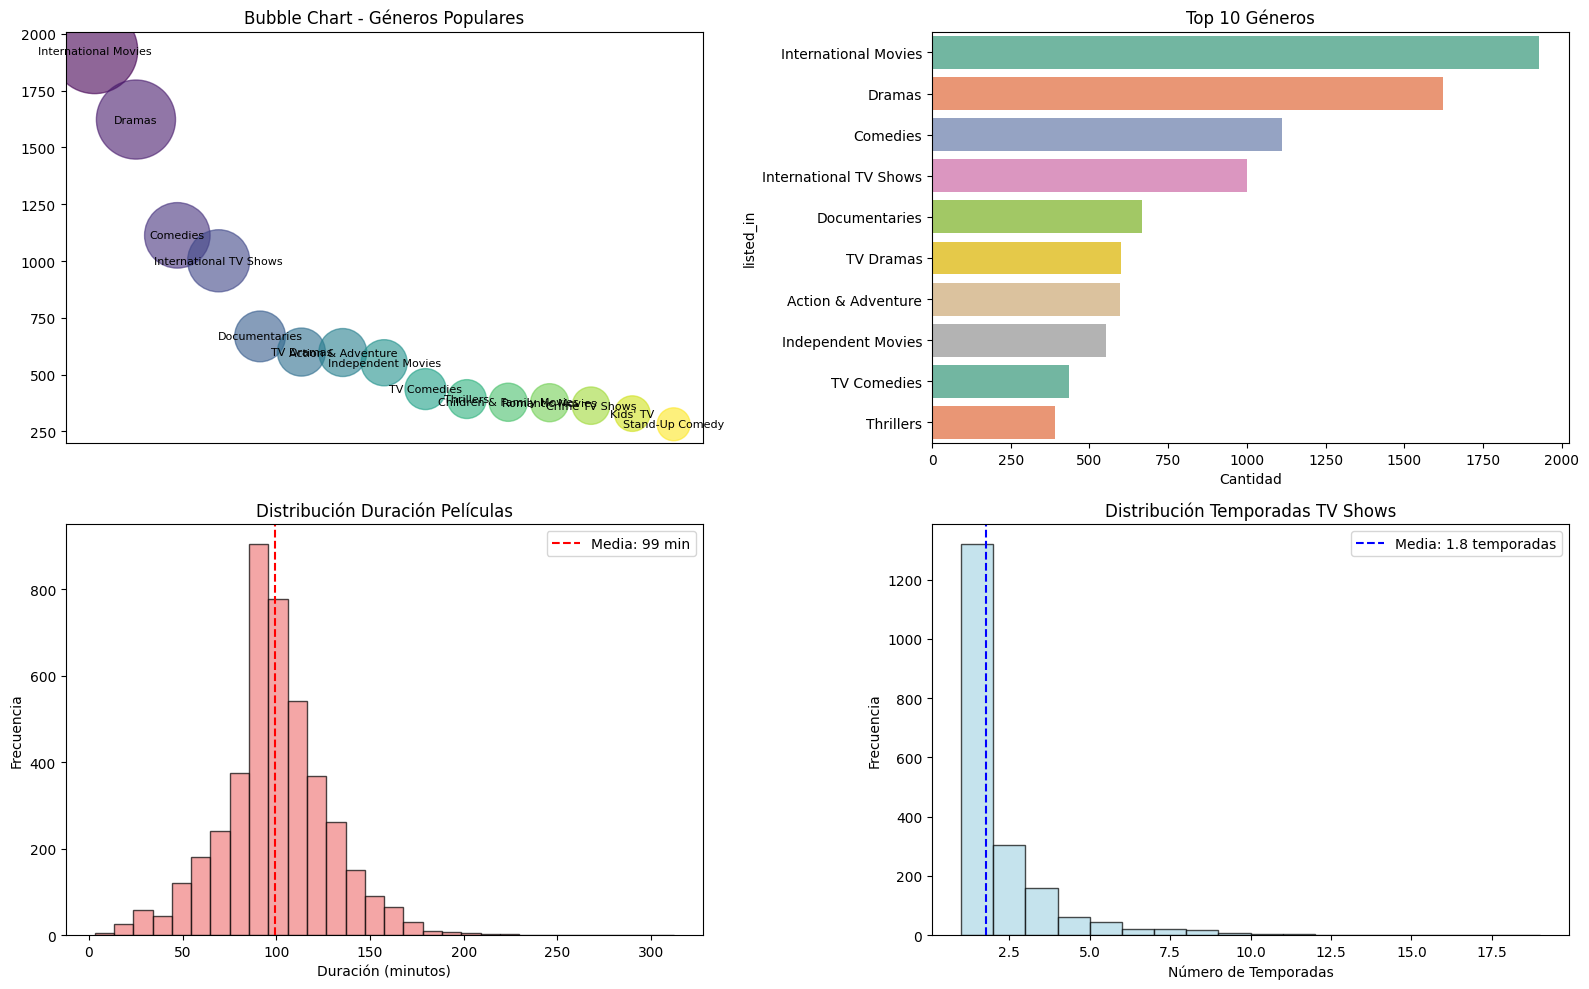


📊 ESTADÍSTICAS DE DURACIÓN:
   Película promedio: 99 minutos
   Película más corta: 3 minutos
   Película más larga: 312 minutos
   Serie promedio: 1.8 temporadas
   Serie más larga: 15 temporadas


In [10]:
# === ANÁLISIS AVANZADO DE GÉNEROS ===

# 1. Separar géneros que están en lista separada por comas
genres_expanded = df.dropna(subset=['listed_in'])['listed_in'].str.split(', ').explode()
top_genres = genres_expanded.value_counts().head(15)  # contar frecuencias de géneros y tomar top 15

print("🎬 TOP 15 GÉNEROS MÁS POPULARES:")
print(top_genres)

# 2. Crear visualización de géneros
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Word cloud simulado con scatter
axes[0, 0].scatter(range(len(top_genres)), top_genres.values,  # función para gráfico de burbujas (scatter)
                  s=top_genres.values*2, alpha=0.6, c=range(len(top_genres)), cmap='viridis')
for i, (genre, count) in enumerate(top_genres.items()):
    axes[0, 0].annotate(genre, (i, count), ha='center', va='center', fontsize=8)
axes[0, 0].set_title('Bubble Chart - Géneros Populares')
axes[0, 0].set_xticks([])

# Barras horizontales de géneros
sns.barplot(y=top_genres.head(10).index, x=top_genres.head(10).values,  # función para barras horizontales
           ax=axes[0, 1], hue=top_genres.head(10).index ,palette='Set2')
axes[0, 1].set_title('Top 10 Géneros')
axes[0, 1].set_xlabel('Cantidad')

# Análisis de duración de películas
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_min'] = movies_df['duration'].str.extract(r'(\d+)').astype(float) # Corregido: Usar raw string

axes[1, 0].hist(movies_df['duration_min'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')  # función para histograma de frecuencias
axes[1, 0].set_title('Distribución Duración Películas')
axes[1, 0].set_xlabel('Duración (minutos)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].axvline(movies_df['duration_min'].mean(), color='red', linestyle='--',
                   label=f'Media: {movies_df["duration_min"].mean():.0f} min')
axes[1, 0].legend()

# Análisis de temporadas de series
tv_shows_df = df[df['type'] == 'TV Show'].copy()
tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract(r'(\d+)').astype(float) # Corregido: Usar raw string

axes[1, 1].hist(tv_shows_df['seasons'], bins=range(1, 20), alpha=0.7, color='lightblue', edgecolor='black')  # función para histograma con bins personalizados
axes[1, 1].set_title('Distribución Temporadas TV Shows')
axes[1, 1].set_xlabel('Número de Temporadas')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].axvline(tv_shows_df['seasons'].mean(), color='blue', linestyle='--',
                   label=f'Media: {tv_shows_df["seasons"].mean():.1f} temporadas')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print(f"\n📊 ESTADÍSTICAS DE DURACIÓN:")
print(f"   Película promedio: {movies_df['duration_min'].mean():.0f} minutos")
print(f"   Película más corta: {movies_df['duration_min'].min():.0f} minutos")
print(f"   Película más larga: {movies_df['duration_min'].max():.0f} minutos")
print(f"   Serie promedio: {tv_shows_df['seasons'].mean():.1f} temporadas")
print(f"   Serie más larga: {tv_shows_df['seasons'].max():.0f} temporadas")

In [1]:
'''pip install ydata-profiling
'''

'pip install ydata-profiling\n'

In [2]:
'''# === PROFILING AUTOMÁTICO DEL DATASET ===

# 1. Instalar ydata-profiling (si no está instalado)
#!pip install ydata-profiling

# 2. Importar y generar el reporte
from ydata_profiling import ProfileReport  # clase principal para generar reportes

print("🤖 Generando reporte automático de EDA...")

# 3. Crear perfil del dataset
profile = ProfileReport(df, title="Netflix Dataset - EDA Report", explorative=True)  # función principal para crear perfil

# 4. Personalizar el reporte
profile.config.html.minify_html = False  # HTML más legible
profile.config.html.use_local_assets = True  # usar assets locales

# 5. Generar reporte HTML
profile.to_file("netflix_eda_report.html")  # método para guardar reporte como HTML

profile'''

'# === PROFILING AUTOMÁTICO DEL DATASET ===\n\n# 1. Instalar ydata-profiling (si no está instalado)\n#!pip install ydata-profiling\n\n# 2. Importar y generar el reporte\nfrom ydata_profiling import ProfileReport  # clase principal para generar reportes\n\nprint("🤖 Generando reporte automático de EDA...")\n\n# 3. Crear perfil del dataset\nprofile = ProfileReport(df, title="Netflix Dataset - EDA Report", explorative=True)  # función principal para crear perfil\n\n# 4. Personalizar el reporte\nprofile.config.html.minify_html = False  # HTML más legible\nprofile.config.html.use_local_assets = True  # usar assets locales\n\n# 5. Generar reporte HTML\nprofile.to_file("netflix_eda_report.html")  # método para guardar reporte como HTML\n\nprofile'

* ¿Qué tipo de visualización es más efectiva para mostrar distribuciones temporales?

El gráfico de línea permite observar tendencias y patrones año a año y el El área bajo la curva añade una percepción acumulativa, resaltando la magnitud total.


* ¿Por qué usamos diferentes tipos de gráficos para diferentes datos?


Cada gráfico responde mejor a un tipo de pregunta:

Barras y columnas indicados para comparaciones entre categorías .

grafico de torta indicado para proporciones simples.

Líneas para evolución en el tiempo.

Boxplots para detectar outliers y distribuciónes estadísticas.

Mapas de calor  para resaltar patrones y densidades en múltiples dimensiones.

La combinación de diferentes tipos ayuda a ver patrones, proporciones, anomalías y tendencias desde ángulos distintos.

* ¿Qué insights de negocio obtuviste que Netflix podría usar?


Desde 2010 hasta 2021 se observa un crecimiento acelerado de lanzamientos, con picos en ciertos años. Esto indica que Netflix aumentó la producción y adquisición de títulos rápidamente, lo cual refleja una estrategia de expansión de catálogo.

Predominan las películas sobre las series, aunque en la última década la proporción de TV Shows ha aumentado.

El mapa de calor muestra que la mayor parte del contenido es reciente (2000 en adelante). Hay un foco en contenido moderno.


Se podria optimizar su estrategia de contenido, enfocando lanzamientos donde hay mayor crecimiento (series recientes).